#IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#IMPORTING DATASET

In [ ]:
data=pd.read_csv('WineQT.csv')

#ANALYZING THE DATASET

In [ ]:
print(data.size)
data.head(10)

14859


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,6
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8
9,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,10


#VISUALISING DATASET

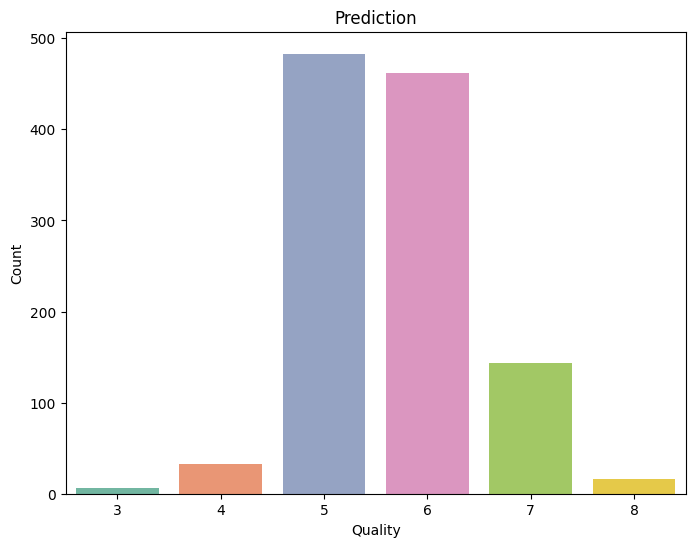

Prediction:
5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64


In [ ]:
# Count the occurrences of each class in the target variable
class_counts = data['quality'].value_counts()

# Plot a bar graph to visualize class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=data, palette='Set2')
plt.title('Prediction')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

# Print the class counts
print("Prediction:")
print(class_counts)

#CONVERTING STRING DATA TO NUMERIC DATA

In [ ]:
categorical_columns = ['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH','sulphates','alcohol']
for col in categorical_columns:
  data[col] = pd.to_numeric(data[col], errors='coerce')

#CHECKING NAN VALUES

In [ ]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

#SPLITTING DATASET INTO FEATURES(X) AND TARGET LABLES(Y)

In [ ]:
X = data.iloc[:,:-2].values
y = data.iloc[:,-2].values

#SPLITTING DATASET INTO TRAINING AND TESTING SET

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#FEATURE SCALING

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

#TRAINING OUR MODEL USING RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

#GETTING ACCURACY SCORE

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.66
